In [58]:
import numpy as np
import gym
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# percentage optimal action per step
sns.set(style="darkgrid")

In [59]:
env = gym.make("FrozenLake-v0")
action_space_size = env.action_space.n
state_space_size = env.observation_space.n 
q_table = np.zeros((state_space_size,action_space_size))
print(f'{state_space_size} states with {action_space_size} actions.')
print(q_table)

16 states with 4 actions.
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [51]:
num_episodes = 10000
max_steps_per_episode=100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1 
min_exploration_rate = 0.01
exploration_rate_decay = 0.01

rewards_all_episodes = []

optimal_step_count = np.zeros(num_episodes) 
total_step_count = np.zeros(num_episodes)

#q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done=False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
        
        #Exploration-Exploitation trade-off
        if random.uniform(0, 1) > exploration_rate:
            action = np.argmax(q_table[state,:])
            optimal_step_count[episode] += 1
        else:
            action = env.action_space.sample()
            
        total_step_count[episode] += 1
        new_state, reward, done, info = env.step(action)
        
        #Update Q-Table for Q(s,a)
       # print("new_state: ",new_state, ", action:",action)
       # print("q_table[new_state,:]",q_table[new_state,:])
        q_table[state, action] = q_table[state,action] * (1-learning_rate) +\
            learning_rate*(reward+discount_rate*np.max(q_table[new_state,:]))
        
        state = new_state
        rewards_current_episode += reward
        
        if done == True:
            break

    #Exploration rate decay
    exploration_rate = min_exploration_rate +\
            (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_rate_decay*episodes)
    
    rewards_all_episodes.append(rewards_current_episode)
    
#Calculate and Print the Average Reward per Thousand Episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
for r in rewards_per_thousand_episodes:
    print(count,":",str(sum(r/1000)))
    count += 1000
    
#Print update Q-Table
print("\n\n***************** Q-Table *****************\n")
print(q_table)

1000 : 0.6840000000000005
2000 : 0.6980000000000005
3000 : 0.7050000000000005
4000 : 0.6640000000000005
5000 : 0.7010000000000005
6000 : 0.6850000000000005
7000 : 0.6820000000000005
8000 : 0.6770000000000005
9000 : 0.6920000000000005
10000 : 0.6920000000000005


***************** Q-Table *****************

[[0.5951954  0.51795279 0.52111789 0.51388372]
 [0.36724093 0.39571557 0.23724678 0.51323355]
 [0.41881246 0.3908178  0.39457803 0.47023127]
 [0.24823458 0.30334772 0.32949826 0.45953364]
 [0.61391886 0.31899317 0.41149305 0.40049023]
 [0.         0.         0.         0.        ]
 [0.4001811  0.1751172  0.21002666 0.092822  ]
 [0.         0.         0.         0.        ]
 [0.41437701 0.47594384 0.3391175  0.65168654]
 [0.55889294 0.73035147 0.4748847  0.41387137]
 [0.69219587 0.37460708 0.3680899  0.37763545]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.5111369  0.37925674 0.81266579 0.56747255]
 [0.73392122 0.90386015 0.78351141

Text(0.5, 0, 'episode')

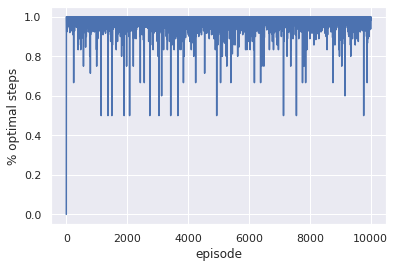

In [65]:
# Plot the percentage of optimal steps taken per episode
percentage_optimal_steps = optimal_step_count/total_step_count
plt.plot(percentage_optimal_steps)
plt.ylabel('% optimal steps')
plt.xlabel('episode')

Text(0.5, 0, 'episode')

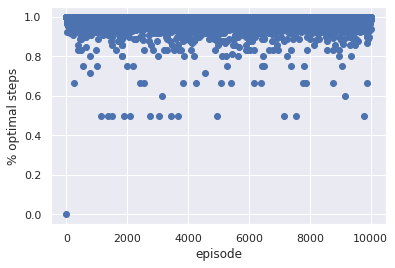

In [67]:
# Plot the percentage of optimal steps taken per episode
percentage_optimal_steps = optimal_step_count/total_step_count
plt.scatter(range(num_episodes), percentage_optimal_steps)
plt.ylabel('% optimal steps')
plt.xlabel('episode')

Text(0.5, 0, 'episode')

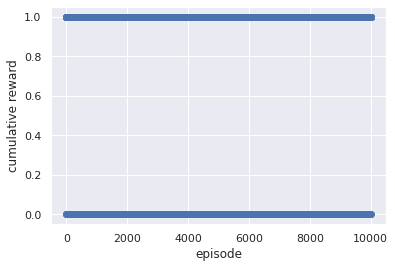

In [70]:
# Cumulative reward for each episode
plt.scatter(range(num_episodes), rewards_all_episodes)
plt.ylabel('cumulative reward')
plt.xlabel('episode')